In [1]:
import sys
datadirs = ''
sys.path.insert(1, datadirs)
savepath = datadirs+'save/'
datapath = datadirs+'data/'

In [2]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
from pars import PARS

In [14]:
import utils
from utils import *
from setup_net import *
from loss import *

In [16]:
import importlib
importlib.reload(utils)
from utils import *

In [9]:
pars = PARS(device, datapath, savepath)
pars.architecture = 'CONV6'
pars.LR = 0.0001
pars.clf_lr = 0.001
pars.epochs = 300
pars.clf_epochs = 100
pars.nonlinear = 'hardtanh'
pars.repeat = 1
pars.lam = 1 # proportion of the reconstruction loss
print(pars)

architecture: CONV6
nonlinear: hardtanh
batch_size: 500
headsize: 64
dataset: Cifar100
loss: SimCLR
OPT: Adam
LR: 0.0001
epochs: 300
clf_dataset: Cifar10
clf_loss: CE
clf_opt: Adam
clf_lr: 0.001
clf_epochs: 100
repeat: 1
device: cuda:0
datapath: data/
savepath: save/
loadnet: None
loadclf: None
lam: 1
auxnonlinear: None



architecture: CONV6
nonlinear: hardtanh
batch_size: 500
headsize: 64
dataset: Cifar100
loss: SimCLR
OPT: Adam
LR: 0.0001
epochs: 300
clf_dataset: Cifar10
clf_loss: CE
clf_opt: Adam
clf_lr: 0.001
clf_epochs: 100
repeat: 1
device: cuda:0
datapath: data/
savepath: save/
loadnet: None
loadclf: None
lam: 1
auxnonlinear: None
train_unsupervised: True
NUM_LAYER: 5

save/CONV6/AE/
hardtanh_Cifar100_Adam_LR_0.0001_Epochs_300_CLF_Cifar10_Adam_LR_0.001_Epochs_100_lam_1
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

Rep 1
Sequential(
  (layer0): Sequential(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (activation): Hardtanh(min_val=-1.0, max_val=1.0)
  )
  (layer1): Sequential(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2):

TypeError: Invalid shape (3, 32, 32) for image data

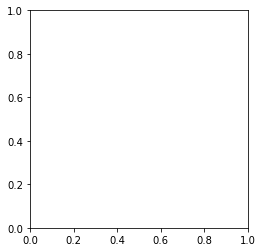

In [15]:
train_unsupervised_ae(pars,print_image=True)

In [ ]:
pars = PARS(device, datapath, savepath)
pars.architecture = 'CONV6'
pars.LR = 0.0001
pars.clf_lr = 0.001
pars.epochs = 300
pars.clf_epochs = 100
pars.nonlinear = 'hardtanh'
pars.repeat = 1
pars.lam = 0
print(pars)

In [ ]:
train_unsupervised_ae(pars)

In [ ]:
pars = PARS(device, datapath, savepath)
pars.architecture = 'CONV6'
pars.LR = 0.0001
pars.clf_lr = 0.001
pars.epochs = 300
pars.clf_epochs = 100
pars.nonlinear = 'hardtanh'
pars.repeat = 1
pars.lam = 0.5
print(pars)

In [ ]:
train_unsupervised_ae(pars)

- average reconstruction loss
- reconstruction result
- zero weight on BT
- lambda from small to large

In [ ]:
pars = PARS(device, datapath, savepath)
pars.architecture = 'CONV6'
pars.LR = 0.0001
pars.clf_lr = 0.001
pars.epochs = 300
pars.clf_epochs = 100
pars.nonlinear = 'hardtanh'
pars.repeat = 1
pars.loss = "BarlowTwins"
pars.lam = 0.5
print(pars)

In [ ]:
criterion = BarlowTwinsLoss(pars.batch_size, pars.lam, pars.device)
train_unsupervised(pars, criterion=criterion, clf_criterion=None, optimizer=None)